## Text_Parsing test


In [1]:
test_text = "This is a sample text. It contains some words, and stop words like 'the' and 'is'."
original_text = test_text

In [2]:
def print_comparison():
    print("Original text: ", original_text)
    print("Test text:     ", test_text)

### Lowercasing text

In [3]:
test_text = test_text.lower()
print_comparison()

Original text:  This is a sample text. It contains some words, and stop words like 'the' and 'is'.
Test text:      this is a sample text. it contains some words, and stop words like 'the' and 'is'.


### Removing punctuation and numbers

In [4]:
import re # regular expressions

In [5]:
# should I remove numbers too or just letters? [^a-zA-Z0-9] --- Will probably depend on each use case
test_text = re.sub(r"[^a-zA-Z]", " ", test_text)
print_comparison()

Original text:  This is a sample text. It contains some words, and stop words like 'the' and 'is'.
Test text:      this is a sample text  it contains some words  and stop words like  the  and  is  


### Removing stopwords

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mellio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
sw = stopwords.words("english")
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
test_text = test_text.split()
test_text[:10]

['this', 'is', 'a', 'sample', 'text', 'it', 'contains', 'some', 'words', 'and']

In [9]:
for word in test_text:
    if word in sw:
        test_text.remove(word)
test_text[:10]

['sample', 'text', 'contains', 'words', 'stop', 'words', 'like', 'and', 'is']

### Lemmatization or Stemming

In [10]:
# using stemming for speed
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [11]:
for i in range(len(test_text)):
    test_text[i] = ps.stem(test_text[i])
test_text[:10]

['sampl', 'text', 'contain', 'word', 'stop', 'word', 'like', 'and', 'is']

In [12]:
test_text = " ".join(test_text)
test_text

'sampl text contain word stop word like and is'

In [13]:
print_comparison()

Original text:  This is a sample text. It contains some words, and stop words like 'the' and 'is'.
Test text:      sampl text contain word stop word like and is


In [14]:
dictionary = {}

for word in test_text.split():
    if word in dictionary:
        dictionary[word] += 1
    else:
        dictionary[word] = 1
dictionary

{'sampl': 1,
 'text': 1,
 'contain': 1,
 'word': 2,
 'stop': 1,
 'like': 1,
 'and': 1,
 'is': 1}

In [15]:
def text_parse(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]',' ', text)
    text = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(tokens)
text = text_parse(original_text)
print(text)


sampl text contain word stop word like


### Counter test


In [16]:
from collections import Counter

tokens = text.split()
most_ocurrence = {word: tokens.count(word) for word in tokens}
print(most_ocurrence)
print(Counter(tokens))

sorted_count = sorted(most_ocurrence.items(), \
    key=lambda val: val[1], reverse=True)
print(sorted_count)

for word, count in sorted_count[:5]:
    print(f"{word}: {count}")



{'sampl': 1, 'text': 1, 'contain': 1, 'word': 2, 'stop': 1, 'like': 1}
Counter({'word': 2, 'sampl': 1, 'text': 1, 'contain': 1, 'stop': 1, 'like': 1})
[('word', 2), ('sampl', 1), ('text', 1), ('contain', 1), ('stop', 1), ('like', 1)]
word: 2
sampl: 1
text: 1
contain: 1
stop: 1


In [17]:
def word_freq_analysis(text, top_n=5):
    tokens= text.split()
    words_count= Counter(tokens)

    sorted_count = sorted(words_count.items(), \
         key=lambda val:val[1], reverse=True)

    for word, count in sorted_count[:top_n]:
        print(f'{word}: {count}')

In [18]:
text_file = './book.txt'

In [19]:
with open(text_file, 'r', encoding='utf-8') as file:
    text = file.read()

gutt_book = text_parse(text)
word_freq_analysis(gutt_book,10)


one: 209
could: 198
would: 184
feel: 155
yet: 152
man: 137
father: 134
day: 133
upon: 128
work: 128


### ngrams


In [20]:
from nltk.util import ngrams


In [21]:
list(ngrams(gutt_book.split(), 2))[:10]

[('project', 'gutenberg'),
 ('gutenberg', 'ebook'),
 ('ebook', 'frankenstein'),
 ('frankenstein', 'modern'),
 ('modern', 'prometheu'),
 ('prometheu', 'ebook'),
 ('ebook', 'use'),
 ('use', 'anyon'),
 ('anyon', 'anywher'),
 ('anywher', 'unit')]

In [22]:
list(ngrams(gutt_book.split(), 3))[:10]

[('project', 'gutenberg', 'ebook'),
 ('gutenberg', 'ebook', 'frankenstein'),
 ('ebook', 'frankenstein', 'modern'),
 ('frankenstein', 'modern', 'prometheu'),
 ('modern', 'prometheu', 'ebook'),
 ('prometheu', 'ebook', 'use'),
 ('ebook', 'use', 'anyon'),
 ('use', 'anyon', 'anywher'),
 ('anyon', 'anywher', 'unit'),
 ('anywher', 'unit', 'state')]

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def text_parse_nltk(text, lemmatize=False, keep_numbers=False):

    text = re.sub(r'[^a-zA-Z\s]' if not keep_numbers else r'[^a-zA-Z0-9\s]', '', text.lower())
    
    words = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    
    processor = WordNetLemmatizer() if lemmatize else PorterStemmer()
    
    result_tokens = [processor.lemmatize(word) if lemmatize else processor.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(result_tokens)
text_parse_nltk(original_text)

[nltk_data] Downloading package punkt to /Users/mellio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mellio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mellio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'sampl text contain word stop word like'

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def text_parse_spacy(text, lemmatize=False, keep_numbers=False):
    doc = nlp(text)
    result_tokens = []
    
    for token in doc:
        if not token.is_stop and (token.is_alpha or (keep_numbers and token.is_digit)):
            lemma = token.lemma_ if lemmatize else token.text
            result_tokens.append(lemma)
    
    return ' '.join(result_tokens)


[nltk_data] Downloading package punkt to /Users/mellio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mellio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mellio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{"parsed_text": "splendid palace emerald city center fairy land oz great throne room princess ozma ruler hour day sits throne glistening emerald listens trouble people sure tell around ozmas throne occasion grouped important personage oz scarecrow jack pumpkinhead tiktok clockwork man tin woodman wizard oz shaggy man famous fairy people little dorothy usually seat ozmas foot crouched either side throne two enormous beast known hungry tiger cowardly lion two beast ozmas chief guardian everyone love beautiful girl princess never disturbance great throne room anything guardian look fierce solemn keep quiet royal audience people go away home course one would dare naughty huge lion tiger crouched beside throne fact people oz seldom naughty ozmas big guard ornamental useful one realizes better beast one day everybody left throne room except cowardly lion hungry tiger lion yawned said friend im getting tired job one afraid u one pay attention u true replied big tiger purring softly might well

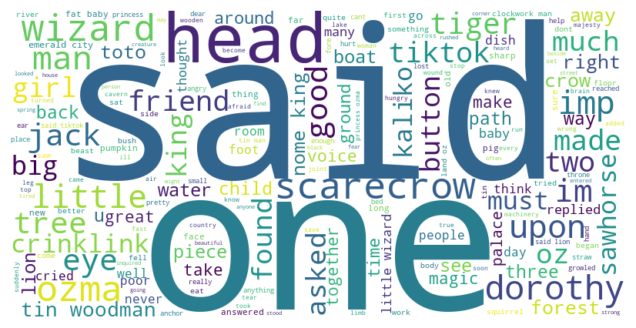

In [25]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
import json
import pickle
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

def text_parse_nltk(text, lemmatize=False, keep_numbers=False):
    text = re.sub(r'[^a-zA-Z\s]' if not keep_numbers else r'[^a-zA-Z0-9\s]', '', text.lower())
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    processor = WordNetLemmatizer() if lemmatize else PorterStemmer()
    result_tokens = [processor.lemmatize(word) if lemmatize else processor.stem(word) for word in words if word not in stop_words]
    return ' '.join(result_tokens)

# Load the Wizard of Oz text
with open('./wizard_of_oz_stories.pk', 'rb') as file:
    wizard_of_oz_text = pickle.load(file)

oz_text_combined = ' '.join(wizard_of_oz_text)

processed_text = text_parse_nltk(oz_text_combined, lemmatize=True, keep_numbers=False)

# Count word frequencies
word_freq = Counter(processed_text.split())

terms_50_or_more = [term for term, freq in word_freq.items() if freq >= 50]
terms_10_or_more = [term for term, freq in word_freq.items() if freq >= 10]

# Create a word cloud of the entire book
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

wordcloud.to_file('wordcloud.png')

response = {
    'parsed_text': processed_text,
    'terms_50_or_more': terms_50_or_more,
    'terms_10_or_more': terms_10_or_more,
    'wordcloud_image_path': 'wordcloud.png'
}

print(json.dumps(response))

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
